**Project Overview**

For this project, I have decided to focus on identifing patients being diagnosed with Parkinson’s disease based on their vocalization data. For context, Parkinson’s is a chronic neurodegenerative disorder that causes the degeneration of the brain, causing motor and cognitive issues that may lead to producing dysphonic voice due to probable neurogenic interruptions in the laryngeal nerve paths

Dysphonia is a phonation disorder with the difficulty in the voice production. Dysphonia can be observed with hoarse, harsh, or breathy vowel sounds, as a result of impaired ability of the vocal folds to properly vibrate during exhalation. 

It is reported by Sewall et al. [1] that about 70% to 80% of IPD patients would suffer from dysphonia or other phonatory disorders, with the symptoms of decreased variation, roughness, increased asthenia, dysarthria, or voice tremor. The neurological dysfunction and debilitated communicative deficits of IPD patients greatly cause impact on their social communications and quality of life [2]. Thus it is well within reason to assume a correlation between a patient’s ability to speak and their progression into Parkinson’s as these capabilities regress. 

I will be working with a dataset obtained through a 2008 study by the journal, IEEE Transactions on Biomedical Engineering, of how various parameters of voice frequency can help classify if a patient is suffering from Parkinson’s. Through classification on this data, I hope to obtain findings that vocalization tests are indeed a well suited (alternative or additional) method to diagnose a patient for this disease. 

The proposed diagnosis method could be valuble as it could be administered at home without the need for the patient to visit a hospital – saving time, cost, and energy.







References

[1]. Sewall G. K., Jiang J., Ford C. N. Clinical evaluation of Parkinson's-related dysphonia. Laryngoscope. 2006;116(10):1740–1744. doi: 10.1097/01.mlg.0000232537.58310.22. [PubMed] [CrossRef] [Google Scholar]

[2]. Bhuta T., Patrick L., Garnett J. D. Perceptual evaluation of voice quality and its correlation with acoustic measurements. Journal of Voice. 2004;18(3):299–304. doi: 10.1016/j.jvoice.2003.12.004. [PubMed] [CrossRef] [Google Scholar]


**Problem Statement**

This project attempts to prove that vocalization data from a patient can help diagnose whether or not they suffer from Parkinson’s. As such, it is initially assumed that there is a relationship between the two. I will attempt to run various machine learning classifiers (Ex. Naïve Bayes, SVM, etc.) on the data in hopes to reach a high predictability rate that is matched with a reasonable runtime. The study itself obtained a predictability rate of 91.4% and so I hope to reach a rate close to this or possibly to surpass it. If I can reach a rate that is within a 5% interval of the one obtained in the study, I will have proved the study correct.

We first study the linear correlations between 22 voice parameters of fundamental frequency variability, amplitude variations, and nonlinear measures. The highly correlated vocal parameters are combined by using the linear discriminant analysis method.

In [46]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [47]:
# Tuning libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [48]:
#Import supervised learning model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
#Import Graphing modules
import matplotlib.pyplot as plt
from sklearn import datasets

In [50]:
#Initialize the models
clf = GaussianNB()
clf2 = svm.SVC()
clf3 = SGDClassifier(loss = "hinge")
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate = 1.0, max_depth =1, random_state =0 )

In [51]:
#Data Visualization Values
from pandas.plotting import scatter_matrix
import pylab

In [7]:
df = pd.read_csv("../Parkinsons Vocal Analysis/parkinsons.csv")

In [8]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


1. **Name** - ASCII subject name and recording number

2. **MDVP:Fo(Hz)** - Average vocal fundamental frequency

3. **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

4. **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

5. **MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP** - Several measures of variation in fundamental frequency

6. **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude

7. **NHR,HNR** - Two measures of ratio of noise to tonal components in the voice

8. **status** - Health status of the subject (one) - Parkinson, (zero) - healthy

9. **RPDE,D2** - Two nonlinear dynamical complexity measures

10. **DFA** - Signal fractal scaling exponent

11. **spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

We first study the linear correlations between 22 voice parameters of fundamental frequency variability, amplitude variations, and nonlinear measures. The highly correlated vocal parameters are combined by using the linear discriminant analysis method.

# Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [10]:
df.name.unique()

array(['phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3',
       'phon_R01_S01_4', 'phon_R01_S01_5', 'phon_R01_S01_6',
       'phon_R01_S02_1', 'phon_R01_S02_2', 'phon_R01_S02_3',
       'phon_R01_S02_4', 'phon_R01_S02_5', 'phon_R01_S02_6',
       'phon_R01_S04_1', 'phon_R01_S04_2', 'phon_R01_S04_3',
       'phon_R01_S04_4', 'phon_R01_S04_5', 'phon_R01_S04_6',
       'phon_R01_S05_1', 'phon_R01_S05_2', 'phon_R01_S05_3',
       'phon_R01_S05_4', 'phon_R01_S05_5', 'phon_R01_S05_6',
       'phon_R01_S06_1', 'phon_R01_S06_2', 'phon_R01_S06_3',
       'phon_R01_S06_4', 'phon_R01_S06_5', 'phon_R01_S06_6',
       'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S07_3',
       'phon_R01_S07_4', 'phon_R01_S07_5', 'phon_R01_S07_6',
       'phon_R01_S08_1', 'phon_R01_S08_2', 'phon_R01_S08_3',
       'phon_R01_S08_4', 'phon_R01_S08_5', 'phon_R01_S08_6',
       'phon_R01_S10_1', 'phon_R01_S10_2', 'phon_R01_S10_3',
       'phon_R01_S10_4', 'phon_R01_S10_5', 'phon_R01_S10_6',
       'phon_R01_S13_1',

In [11]:
#Number of patients
n_patients = df.shape[0]
n_patients

195

In [12]:
#Number of features
n_features = df.shape[1]-1
n_features

23

In [13]:
#With Parkinsons
n_parkinsons = df[df['status'] == 1].shape[0]
n_parkinsons

147

In [14]:
#Without Parkinsons
n_healthy = df[df['status'] == 0].shape[0]
n_healthy

48

In [15]:
#Result Output
print ("Total number of patients: {}".format(n_patients))
print ("Number of features: {}".format(n_features))
print ("Number of patients with Parkinsons: {}".format(n_parkinsons))
print ("Number of patients without Parkinsons: {}".format(n_healthy))

Total number of patients: 195
Number of features: 23
Number of patients with Parkinsons: 147
Number of patients without Parkinsons: 48


There are a total of 195 rows of datapoints with 27 feature columns. The voice measurements are from 32 people - 24 with Parkinson’s disease and 8 without. 

In this dataset, 147 of the rows indicates Parkinson’s whereas 48 do not.

# Training and Testing Functions

In [30]:
def train_classifier(clf, X_train, y_train):
    
    #Fits a classifier to the training data
    
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    
    #Makes predictions using a fit classifier based on F1 score
    
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    
    #Train and predict using a classifer based on F1 score
    
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    train_classifier(clf, X_train, y_train)
    
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

# Tuning / Optimization Functions

In [31]:
def performance_metric(y_true, y_predict):
    
    error = f1_score(y_true, y_predict, pos_label=1)
    return error


def fit_model(X, y):
  
    classifier = svm.SVC()
    parameters = {'kernel':['poly', 'rbf', 'sigmoid'], 'degree':[1, 2, 3], 'C':[0.1, 1, 10]}
    f1_scorer = make_scorer(performance_metric,
                                   greater_is_better=True)
    clf = GridSearchCV(classifier,
                       param_grid=parameters,
                       scoring=f1_scorer)
    clf.fit(X, y)

    return clf

# Preparing the Data

In [32]:
# Extract feature columns
feature_cols = list(df.columns[1:16]) + list(df.columns[18:])
target_col = df.columns[17]

In [33]:
# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

Feature columns:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Target column: status


In [34]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df[feature_cols]
y_all = df[target_col]

In [35]:
# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())


Feature values:
   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR      RPDE

In [36]:
# Training and Testing Data Split
num_all = df.shape[0] 
num_train = 150 # about 75% of the data
num_test = num_all - num_train

In [37]:
# Select features and corresponding labels for training/test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test,random_state=5)

In [38]:
print ("Training set: {} samples".format(X_train.shape[0]))
print ("Test set: {} samples".format(X_test.shape[0]))

Training set: 150 samples
Test set: 45 samples


In [39]:
X_train_50 = X_train[:50]
y_train_50 = y_train[:50]

X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_150 = X_train[:150]
y_train_150 = y_train[:150]

# Training the Data

In [41]:
#50 set

print ("Naive Bayes:")
train_predict(clf,X_train_50,y_train_50,X_test,y_test)

print ("Support Vector Machines:")
train_predict(clf2,X_train_50,y_train_50,X_test,y_test)

print ("Stochastic Gradient Descent:")
train_predict(clf3,X_train_50,y_train_50,X_test,y_test)

print ("Gradient Tree Boosting:")
train_predict(clf4,X_train_50,y_train_50,X_test,y_test)

Naive Bayes:
Training a GaussianNB using a training set size of 50. . .
Trained model in 0.0027 seconds
Made predictions in 0.0018 seconds.
F1 score for training set: 0.7619.
Made predictions in 0.0022 seconds.
F1 score for test set: 0.8000.
Support Vector Machines:
Training a SVC using a training set size of 50. . .
Trained model in 0.0021 seconds
Made predictions in 0.0027 seconds.
F1 score for training set: 0.9268.
Made predictions in 0.0021 seconds.
F1 score for test set: 0.8800.
Stochastic Gradient Descent:
Training a SGDClassifier using a training set size of 50. . .
Trained model in 0.0022 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.8947.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.8732.
Gradient Tree Boosting:
Training a GradientBoostingClassifier using a training set size of 50. . .
Trained model in 0.0527 seconds
Made predictions in 0.0015 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0011 seconds.
F1 score for

In [42]:
#100 set

print ("Naive Bayes:")
train_predict(clf,X_train_100,y_train_100,X_test,y_test)

print ("Support Vector Machines:")
train_predict(clf2,X_train_100,y_train_100,X_test,y_test)

print ("Stochastic Gradient Descent:")
train_predict(clf3,X_train_100,y_train_100,X_test,y_test)

print ("Gradient Tree Boosting:")
train_predict(clf4,X_train_100,y_train_100,X_test,y_test)

Naive Bayes:
Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0021 seconds
Made predictions in 0.0025 seconds.
F1 score for training set: 0.7833.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.8276.
Support Vector Machines:
Training a SVC using a training set size of 100. . .
Trained model in 0.0030 seconds
Made predictions in 0.0027 seconds.
F1 score for training set: 0.8820.
Made predictions in 0.0015 seconds.
F1 score for test set: 0.8649.
Stochastic Gradient Descent:
Training a SGDClassifier using a training set size of 100. . .
Trained model in 0.0028 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.5047.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.5882.
Gradient Tree Boosting:
Training a GradientBoostingClassifier using a training set size of 100. . .
Trained model in 0.0702 seconds
Made predictions in 0.0014 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0014 seconds.
F1 score

In [43]:
#150 set

print ("Naive Bayes:")
train_predict(clf,X_train_150,y_train_150,X_test,y_test)

print ("Support Vector Machines:")
train_predict(clf2,X_train_150,y_train_150,X_test,y_test)

print ("Stochastic Gradient Descent:")
train_predict(clf3,X_train_150,y_train_150,X_test,y_test)

print ("Gradient Tree Boosting:")
train_predict(clf4,X_train_150,y_train_150,X_test,y_test)

Naive Bayes:
Training a GaussianNB using a training set size of 150. . .
Trained model in 0.0038 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.7568.
Made predictions in 0.0014 seconds.
F1 score for test set: 0.8276.
Support Vector Machines:
Training a SVC using a training set size of 150. . .
Trained model in 0.0038 seconds
Made predictions in 0.0018 seconds.
F1 score for training set: 0.8933.
Made predictions in 0.0014 seconds.
F1 score for test set: 0.8947.
Stochastic Gradient Descent:
Training a SGDClassifier using a training set size of 150. . .
Trained model in 0.0031 seconds
Made predictions in 0.0016 seconds.
F1 score for training set: 0.0000.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.0000.
Gradient Tree Boosting:
Training a GradientBoostingClassifier using a training set size of 150. . .
Trained model in 0.0866 seconds
Made predictions in 0.0017 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0012 seconds.
F1 score

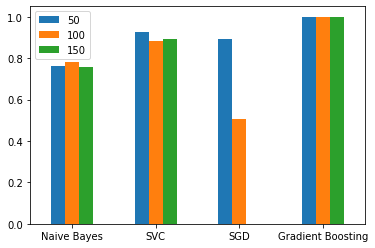

In [59]:
Train_50 = [0.7619, 0.9268, 0.8947, 1.0000]
Train_100 = [0.7833, 0.8820, 0.5047, 1.0000 ]
Train_150 = [0.7568, 0.8933, 0, 1.0000]

index = ['Naive Bayes', 'SVC', 'SGD',
         'Gradient Boosting']
df = pd.DataFrame({'50': Train_50, '100': Train_100, '150': Train_150}, index=index)
ax = df.plot.bar(rot=0)

Graphing the the F1 scores of the four classifiers I have tested, I've eliminated Gradient Boosting as the score is perfect consistently for all there sets of data showing that it overfits extremely well on the training data and thus low variabiltity in its aspect. The classifier will underperform completely on an unseen test data and therefore deemed as unsuitable.

I have also elimated SGD classifier as it is better when data is sparse (ex. Text classification), but is sensitive otherwise as shown that the f1 score is 0.0 as the training data increases to 150.

Between both my viable choices of Naives Bayes and SVC which have both high and most consistence in their F1 score, Support Vector Machines is the most suitable choice with a higher f1 score throughout the 50,100 and 150 training data increment.

# Data Visualization

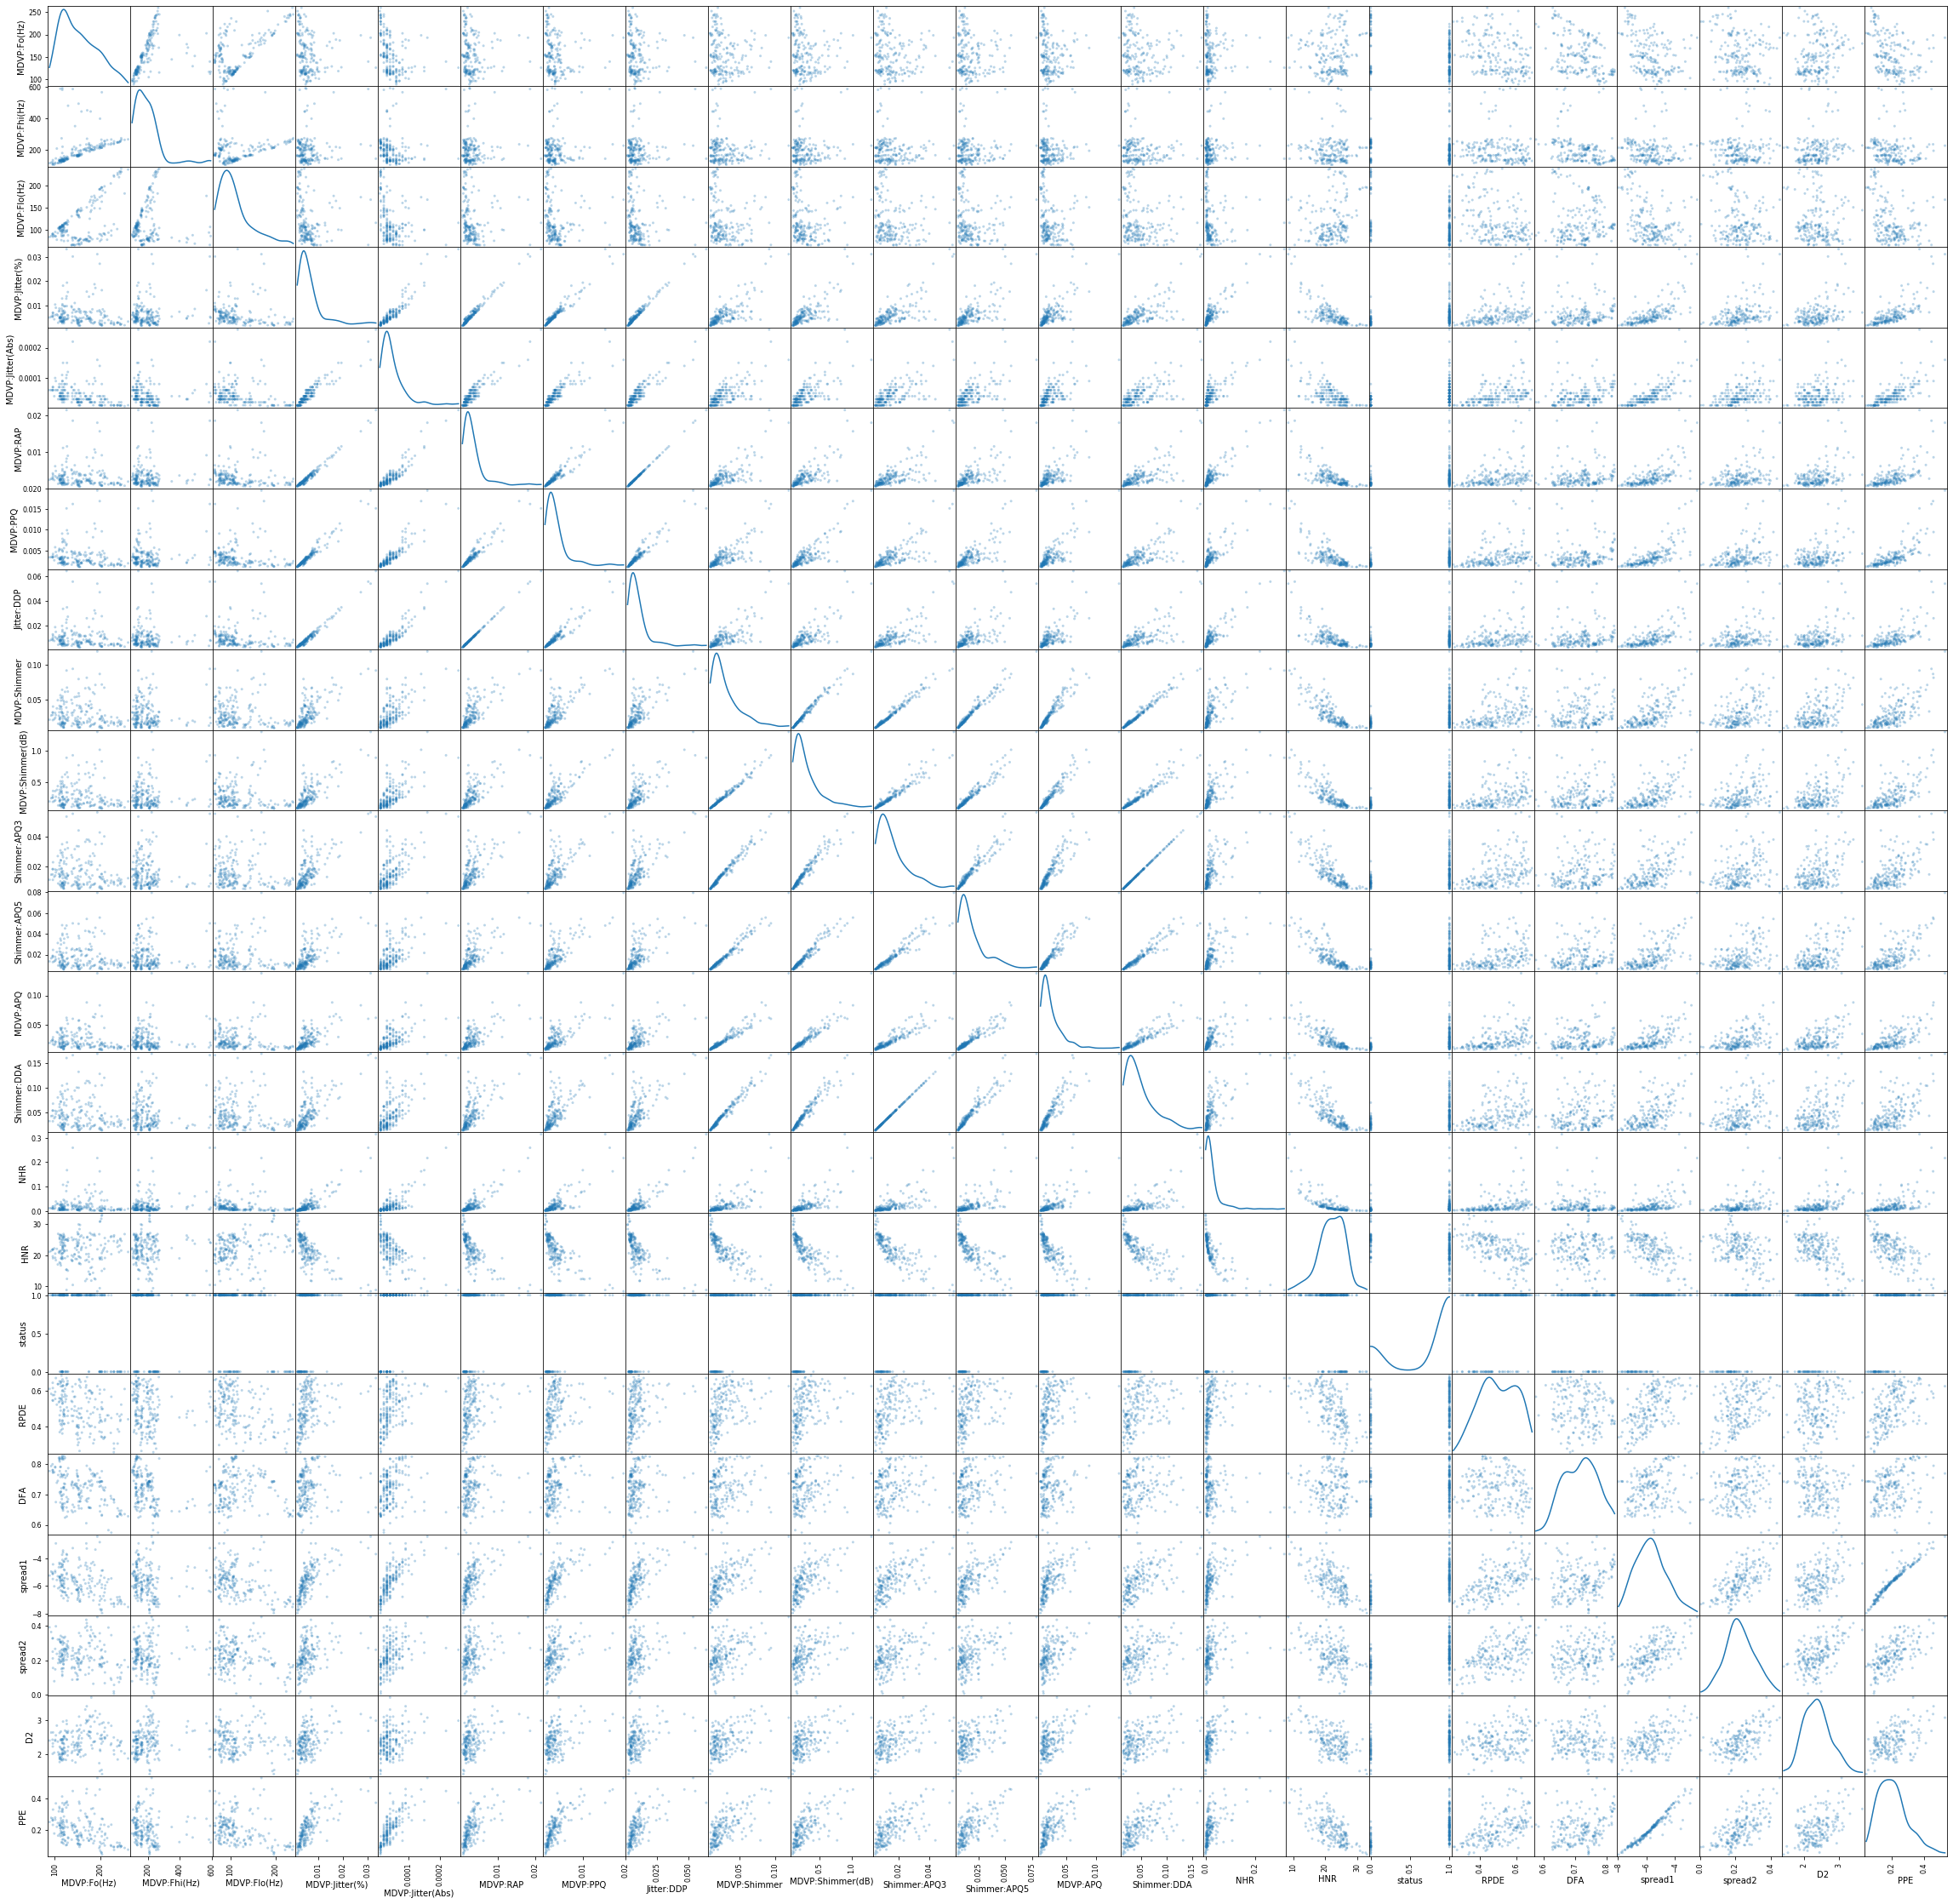

In [55]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha = 0.3, figsize = (40,40), diagonal = 'kde');
pylab.savefig("scatter" + ".png")

# Tuning model (Support Vector Machine)

In [56]:
clf2 = fit_model(X_train, y_train)

print ("The best parameters were: " )
print (clf2.best_params_)

start = time()
    
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf2, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf2, X_test, y_test)))

end = time()
    
print ("Tuned model in {:.4f} seconds.".format(end - start))

The best parameters were: 
{'C': 10, 'degree': 1, 'kernel': 'poly'}
Made predictions in 0.0016 seconds.
Tuned model has a training F1 score of 0.9024.
Made predictions in 0.0013 seconds.
Tuned model has a testing F1 score of 0.8767.
Tuned model in 0.0063 seconds.


The final model aligns with the solution expectations. It produces a F1 score under the best parameters from tuning. I have tested the model under unseen data I have created and it works successfully. The SVM classifier itself is inherently robust to small changes in the training data. We can trust the results from the model, but in industry it may not be so. This is because the final accuracy rate of the SVM was 87.67%, which has a large error for the healthcare industry. Most diagnosis methods must be 97% accurate for them to be applied on patients.